In [4]:
# Suplari Data Exercise Files (1).zip
!unzip "/content/drive/My Drive/Suplari Data Exercise Files (1).zip"


Archive:  /content/drive/My Drive/Suplari Data Exercise Files (1).zip
replace 2015pcard_data (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as tick
from bokeh.plotting import figure, show


a4_dims = (16.7, 13.27)
plt.figure(figsize=a4_dims)



<Figure size 1202.4x955.44 with 0 Axes>

<Figure size 1202.4x955.44 with 0 Axes>

In [35]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (25,15)
sns.set_style("darkgrid")

In [36]:
import pandas as pd

#Data_1 2015pcard_data (1).csv
#Data_2 2016pcard_data (1) (1).csv
#Data_3 2017pcard_data (1) (1).csv
#Data_4 techtrades_2016_data_input_CC (1).csv
#Data_5 techtrades_accounts (1).csv
#Data_6 techtrades_bu (1).csv



data_17 = pd.read_csv(f"2017pcard_data (1) (1).csv") 
data_16 = pd.read_csv(f"2016pcard_data (1).csv") 
data_15 = pd.read_csv(f"2015pcard_data (1).csv") 
bu_names = pd.read_csv(f"techtrades_bu (1).csv") 

data_17['vendor'] = data_17['vendor'].str.casefold()
data_16['vendor'] = data_16['vendor'].str.casefold()
data_15['vendor'] = data_15['vendor'].str.casefold()




In [234]:
amount_sum_16 = pd.pivot_table(data_16, index=['vendor'], values=['amount'], aggfunc='sum')
amount_sum_17 = pd.pivot_table(data_17,index=['vendor'], values=['amount'], aggfunc='sum')

amount_sum_16['amount'] = amount_sum_16.amount.astype(int)
amount_sum_17['amount'] = amount_sum_17.amount.astype(int)

In [235]:
suppliers_17 = data_17.pivot_table(index=['vendor'], aggfunc='size').to_frame( name='count').sort_values(ascending=False, by='count')
suppliers_16 = data_16.pivot_table(index=['vendor'], aggfunc='size').to_frame( name='count').sort_values(ascending=False, by='count')

In [236]:
suppliers_17 = suppliers_17.merge(amount_sum_17, how='inner', left_on='vendor', right_on='vendor').head(10)#.sort_values(ascending=False, by='count')
suppliers_16 = suppliers_16.merge(amount_sum_16, how='inner', left_on='vendor', right_on='vendor').head(10)#.sort_values(ascending=False, by='count')

In [237]:

temp_17 = data_17.merge(suppliers_17, how='inner', left_on='vendor', right_on='vendor')
temp_16 = data_16.merge(suppliers_16, how='inner', left_on='vendor', right_on='vendor')

In [238]:
suppliers_16['year'] = 2016
suppliers_17['year'] = 2017

In [239]:
comparison = pd.concat([suppliers_17, suppliers_16], axis=0)

In [240]:
comparison

,count,amount,year
vendor,,,
cdw direct,11293,3453158,2017
office depot,11015,1007952,2017
uber,10552,225716,2017
amazon aws,7109,1668552,2017
"salesforce.com, inc.",5196,1240089,2017
staples,4390,474132,2017
centurylink,3985,2243072,2017
target,3509,150728,2017
telepress,3469,302311,2017


#**The top 10 suppliers of 2017**



,count,amount,year
vendor,,,
cdw direct,11293,3453158,2017
office depot,11015,1007952,2017
uber,10552,225716,2017
amazon aws,7109,1668552,2017
"salesforce.com, inc.",5196,1240089,2017
staples,4390,474132,2017
centurylink,3985,2243072,2017
target,3509,150728,2017
telepress,3469,302311,2017


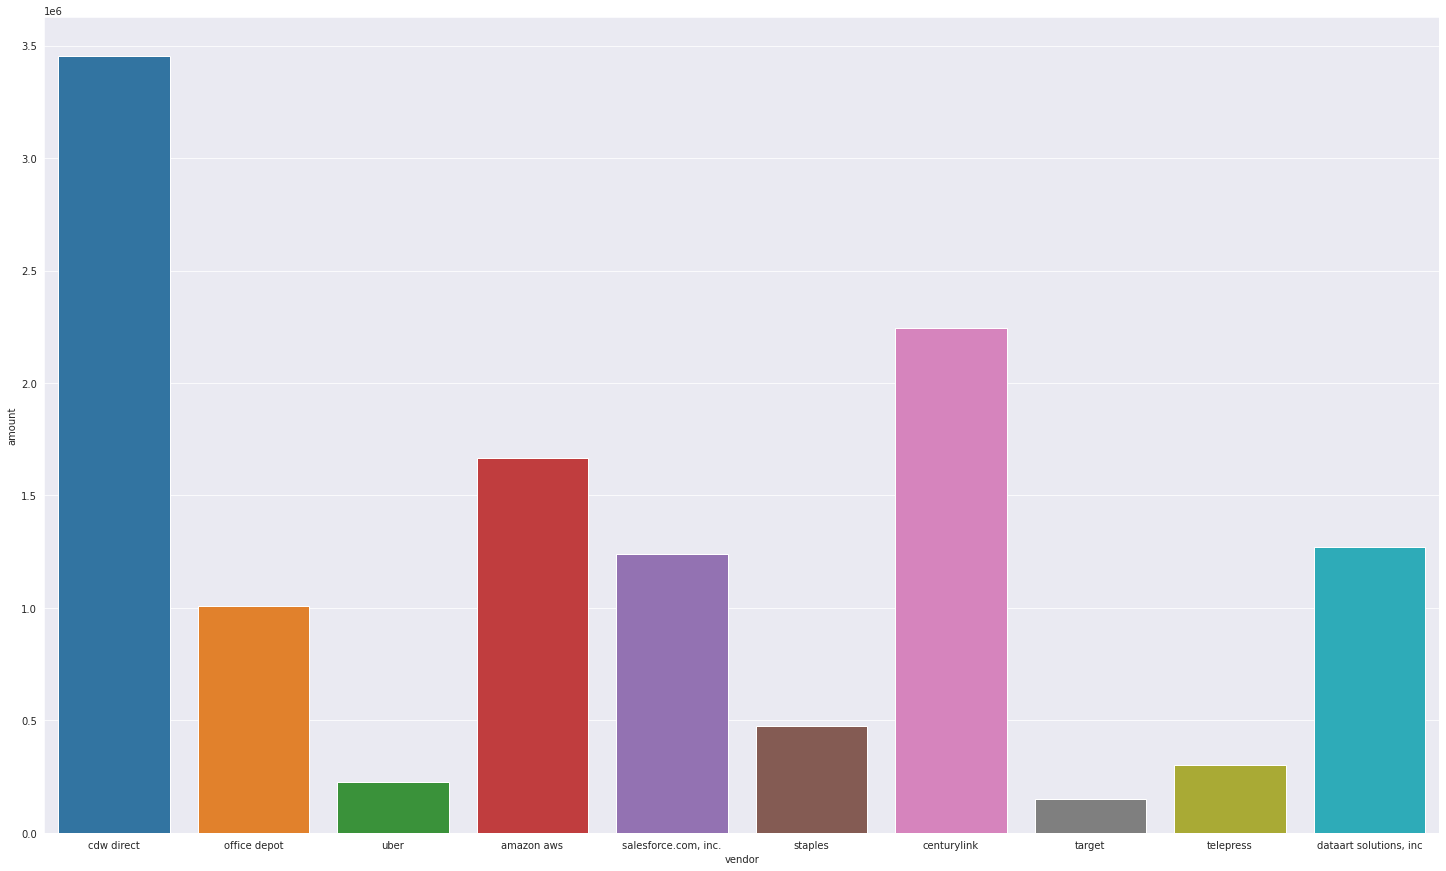

In [241]:

ax = sns.barplot( x=suppliers_17.index, y="amount",  data=suppliers_17 )
suppliers_17

#**The comparison between top 10 suppliers of 2016 and 2017**



,count,amount,year
vendor,,,
cdw direct,11293,3453158,2017
office depot,11015,1007952,2017
uber,10552,225716,2017
amazon aws,7109,1668552,2017
"salesforce.com, inc.",5196,1240089,2017
staples,4390,474132,2017
centurylink,3985,2243072,2017
target,3509,150728,2017
telepress,3469,302311,2017


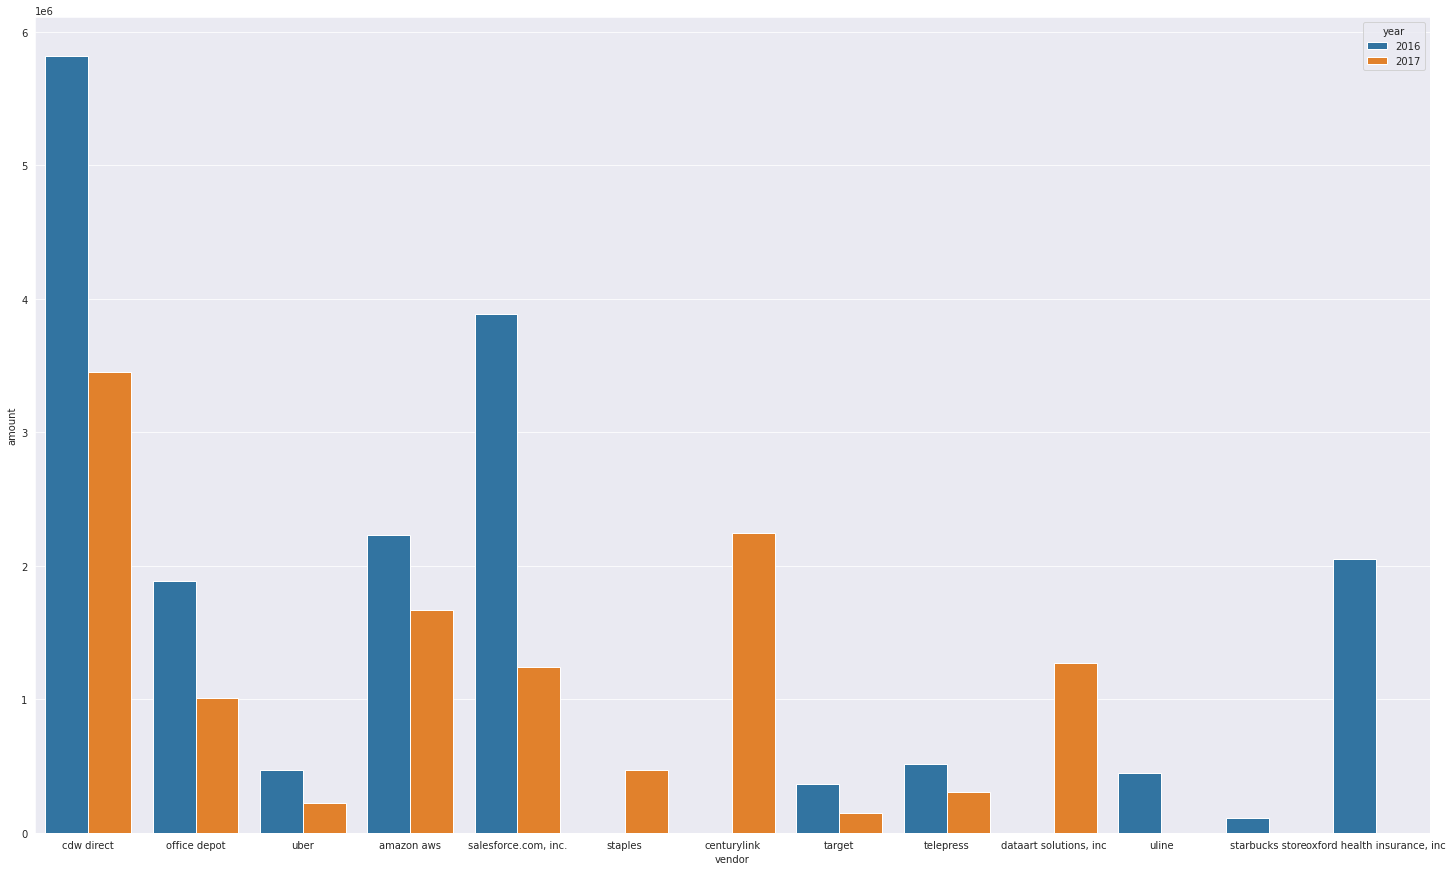

In [242]:

sns.barplot(x = comparison.index, y = 'amount', hue = 'year', data = comparison)
comparison

#**The top  business unit spender of 2017**

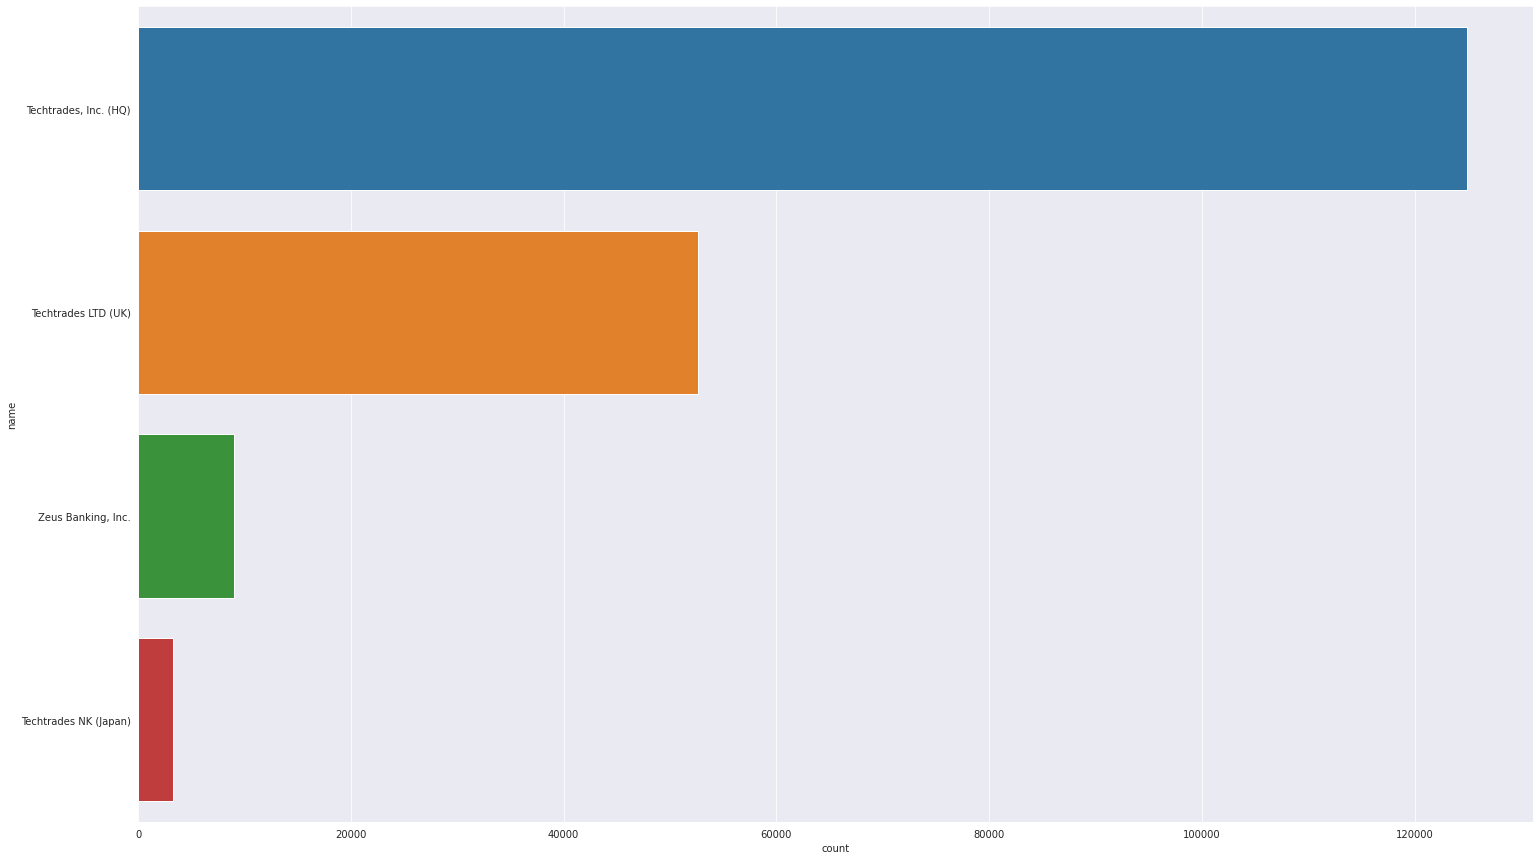

In [243]:
# 10 top suppliers 2017

business_unit  = data_17.pivot_table(index=['bu'], aggfunc='size').to_frame( name='count')
# Combined the 2 dataframe to get the names of the techtrades_bu.csv file to the 2017pcard_data 
dfinal = bu_names.merge(business_unit, how='inner', left_on='buid', right_on='bu').sort_values(ascending=False, by='count')

ax = sns.barplot( x="count", y="name",  data=dfinal)


#**Number of transaction done from 2015-2017**

,transaction,year
0,189858,2017
1,348170,2016
2,425318,2015


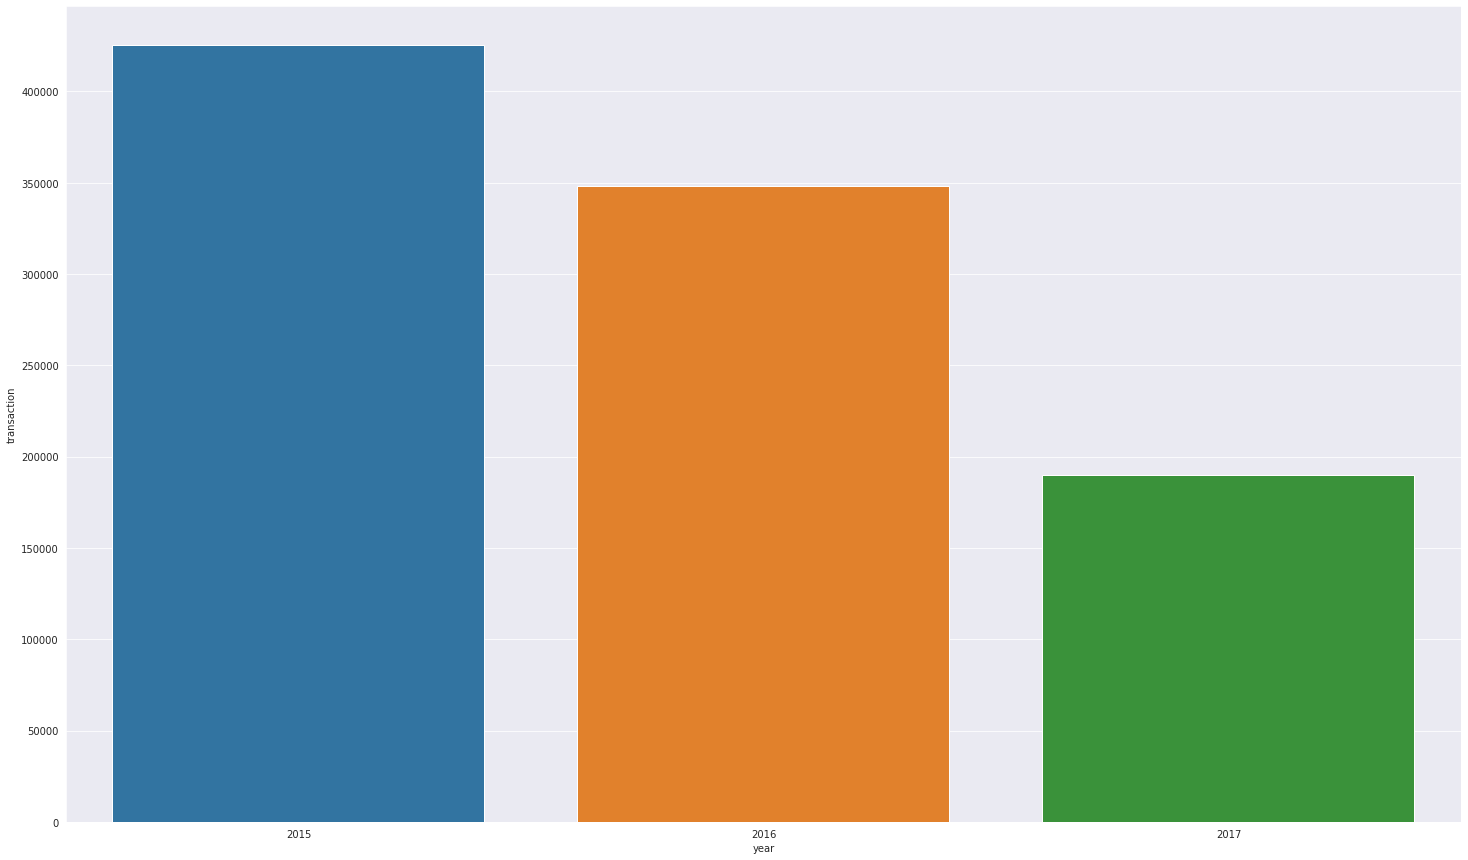

In [246]:
transactions = {
    "transaction" :[len(data_17),len(data_16), len(data_15)],
    "year" : ["2017","2016", "2015"]
}
transactions = pd.DataFrame.from_dict(transactions)
sns.barplot( x="year", y="transaction",  data=transactions)

transactions